In [138]:
import pandas as pd; import numpy as np; import scipy; import seaborn as sns; import matplotlib.pyplot as plt

In [139]:
data = pd.read_csv("Processed_data.csv")

In [140]:
data.head()

,Rc,Ac,Hm0.deep,Hm0.toe,Tp.deep,Tm.deep,Tm.1.0.deep,q
0,0.024,0.077,1.447,1.326,1.591,0.108,0.061,1.109000e-04
1,0.045,0.050,1.897,1.739,2.087,0.126,0.034,5.938000e-04
2,0.063,0.025,1.968,1.804,2.165,0.138,0.009,2.063000e-03
3,0.042,0.025,1.968,1.804,2.165,0.138,0.009,2.078000e-03
4,0.024,0.152,1.447,1.326,1.591,0.108,0.083,3.125000e-07


In [141]:
data.dtypes

Rc             float64
Ac             float64
Hm0.deep       float64
Hm0.toe        float64
Tp.deep        float64
Tm.deep        float64
Tm.1.0.deep    float64
q              float64
dtype: object

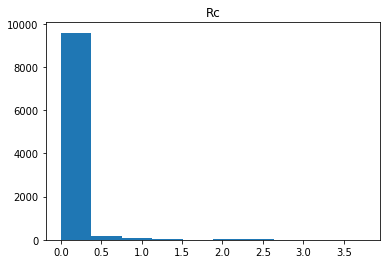

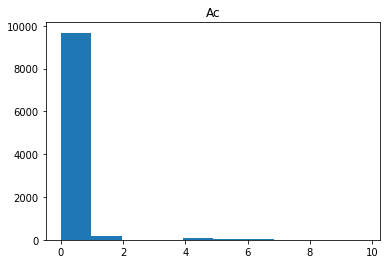

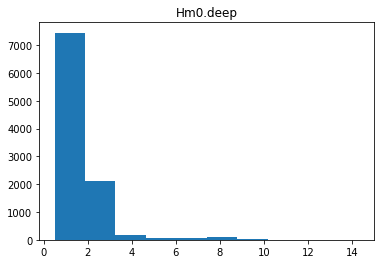

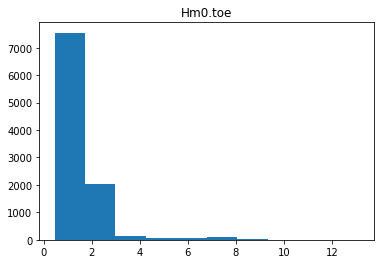

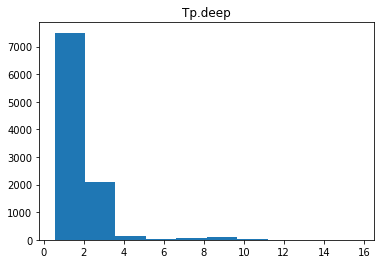

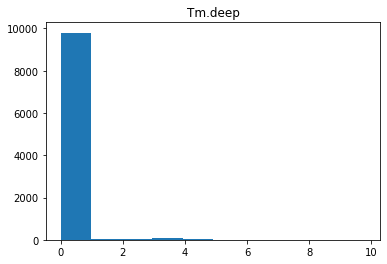

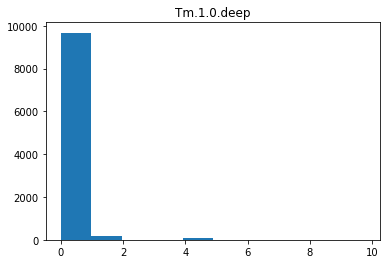

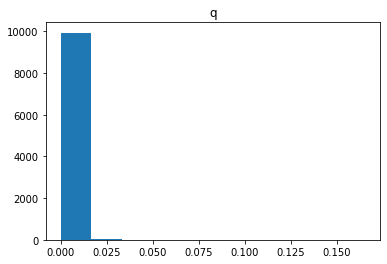

In [142]:
for i in data.columns:
    fig = plt.hist(data[i],bins=10)
    plt.title(i)
    plt.show(fig)

Heavy skew in the response variable with a large cluster of results equal to 0 - i.e. implying _no_ overtopping event. In order to slightly reduce skew and improve later normality transformations I will filter my database based on where q != 0. 

In [143]:
# Find range for all values - BoxCox transformation requires data >0 

for i in data.columns:
    print(min(data[i]),max(data[i]))


0.0 3.765
0.0 9.78
0.495 14.324000000000002
0.45399999999999996 13.13
0.545 15.757
0.003 9.8
0.0 9.78
0.0 0.1653


In [144]:
# Transform all data : X -> (X + C)^y such that X>0
new_data = pd.DataFrame()

for i in data.columns:
    if min(data[i]) <= 0:
        new_data[i] = data[i] + max(1,1-min(data[i]))
    else:
        new_data[i] = data[i]
        
for i in new_data.columns:
    print(min(new_data[i]),max(new_data[i]))
        

1.0 4.765000000000001
1.0 10.78
0.495 14.324000000000002
0.45399999999999996 13.13
0.545 15.757
0.003 9.8
1.0 10.78
1.0 1.1653


In [145]:
new_data

,Rc,Ac,Hm0.deep,Hm0.toe,Tp.deep,Tm.deep,Tm.1.0.deep,q
0,1.024,1.077,1.447,1.326,1.591,0.108,1.061,1.000111
1,1.045,1.050,1.897,1.739,2.087,0.126,1.034,1.000594
2,1.063,1.025,1.968,1.804,2.165,0.138,1.009,1.002063
3,1.042,1.025,1.968,1.804,2.165,0.138,1.009,1.002078
4,1.024,1.152,1.447,1.326,1.591,0.108,1.083,1.000000
...,...,...,...,...,...,...,...,...
9974,1.033,1.095,0.785,0.681,0.753,0.048,1.095,1.000006
9975,1.041,1.095,0.795,0.689,0.914,0.062,1.095,1.000021
9976,1.042,1.095,0.698,0.604,0.731,0.058,1.095,1.000029
9977,1.028,1.095,0.681,0.592,0.826,0.038,1.095,1.000002


In [146]:
transformed_data = pd.DataFrame()

for i in new_data.columns:
    transformed_data[i] = scipy.stats.boxcox(new_data[i])[0]

In [147]:
transformed_data

,Rc,Ac,Hm0.deep,Hm0.toe,Tp.deep,Tm.deep,Tm.1.0.deep,q
0,0.021771,0.061741,0.321675,0.253499,0.392505,-3.296159,0.050893,1.047964e-04
1,0.037628,0.043184,0.505725,0.450138,0.566287,-2.981206,0.030665,4.441315e-04
2,0.049259,0.023198,0.527878,0.473721,0.587200,-2.802771,0.008752,8.547905e-04
3,0.035523,0.023198,0.527878,0.473721,0.587200,-2.802771,0.008752,8.565696e-04
4,0.021771,0.100733,0.321675,0.253499,0.392505,-3.296159,0.065151,3.124497e-07
...,...,...,...,...,...,...,...,...
9974,0.028896,0.072620,-0.266046,-0.447378,-0.315923,-5.247043,0.072196,6.041113e-06
9975,0.034810,0.072620,-0.250874,-0.431728,-0.093008,-4.573660,0.072196,2.067648e-05
9976,0.035523,0.072620,-0.414101,-0.616618,-0.352967,-4.743649,0.072196,2.837672e-05
9977,0.025002,0.072620,-0.446913,-0.646488,-0.205454,-5.913788,0.072196,2.397034e-06


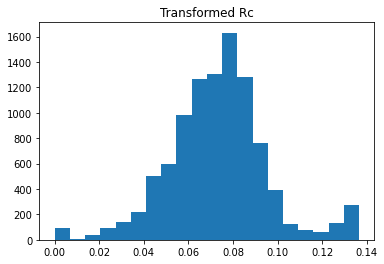

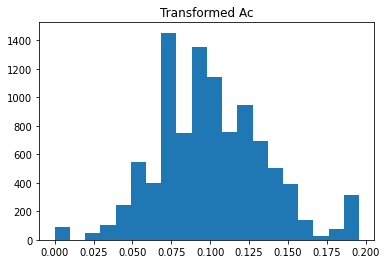

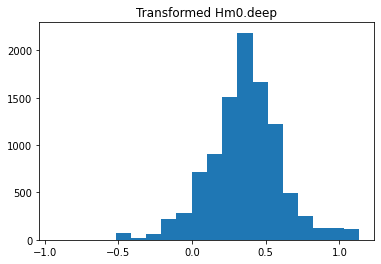

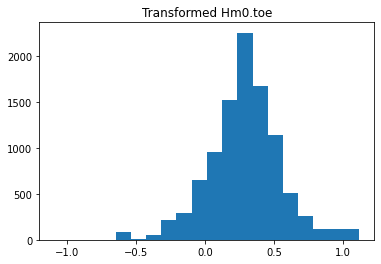

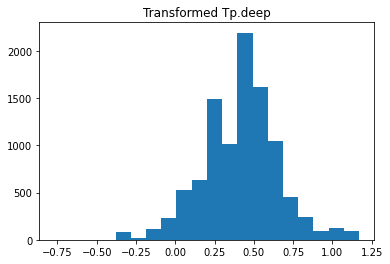

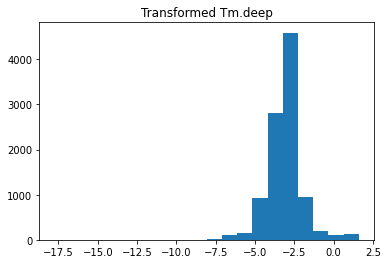

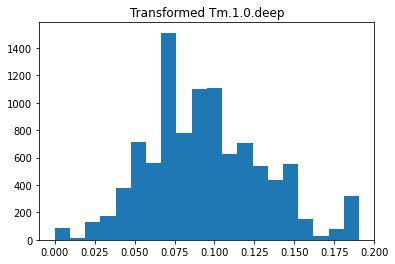

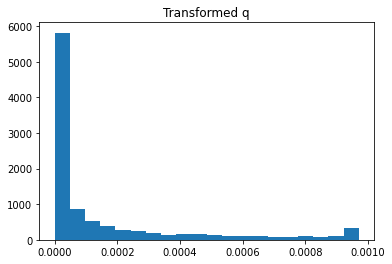

In [148]:
for i in transformed_data.columns:
    fig = plt.hist(transformed_data[i],bins=20)
    plt.title('Transformed '+i)
    plt.show(fig)

I will determine which are gaussian enough and which features shall be discretised at my own discretion based on histograms

In [149]:
transformed_data.to_csv('Gaussian_data.csv',index=None)

**Hybrid Gaussian Data**

In [150]:
import string
alph = list(string.ascii_lowercase)

In [151]:
HybridData = transformed_data

In [152]:
HybridData

,Rc,Ac,Hm0.deep,Hm0.toe,Tp.deep,Tm.deep,Tm.1.0.deep,q
0,0.021771,0.061741,0.321675,0.253499,0.392505,-3.296159,0.050893,1.047964e-04
1,0.037628,0.043184,0.505725,0.450138,0.566287,-2.981206,0.030665,4.441315e-04
2,0.049259,0.023198,0.527878,0.473721,0.587200,-2.802771,0.008752,8.547905e-04
3,0.035523,0.023198,0.527878,0.473721,0.587200,-2.802771,0.008752,8.565696e-04
4,0.021771,0.100733,0.321675,0.253499,0.392505,-3.296159,0.065151,3.124497e-07
...,...,...,...,...,...,...,...,...
9974,0.028896,0.072620,-0.266046,-0.447378,-0.315923,-5.247043,0.072196,6.041113e-06
9975,0.034810,0.072620,-0.250874,-0.431728,-0.093008,-4.573660,0.072196,2.067648e-05
9976,0.035523,0.072620,-0.414101,-0.616618,-0.352967,-4.743649,0.072196,2.837672e-05
9977,0.025002,0.072620,-0.446913,-0.646488,-0.205454,-5.913788,0.072196,2.397034e-06


In [153]:
HybridData['q'] = pd.qcut(HybridData['q'],q=2,duplicates='drop')

In [154]:
HybridData.to_csv('HybridData.csv',index=None)

In [155]:
HybridData

,Rc,Ac,Hm0.deep,Hm0.toe,Tp.deep,Tm.deep,Tm.1.0.deep,q
0,0.021771,0.061741,0.321675,0.253499,0.392505,-3.296159,0.050893,"(2.53e-05, 0.000971]"
1,0.037628,0.043184,0.505725,0.450138,0.566287,-2.981206,0.030665,"(2.53e-05, 0.000971]"
2,0.049259,0.023198,0.527878,0.473721,0.587200,-2.802771,0.008752,"(2.53e-05, 0.000971]"
3,0.035523,0.023198,0.527878,0.473721,0.587200,-2.802771,0.008752,"(2.53e-05, 0.000971]"
4,0.021771,0.100733,0.321675,0.253499,0.392505,-3.296159,0.065151,"(-0.001, 2.53e-05]"
...,...,...,...,...,...,...,...,...
9974,0.028896,0.072620,-0.266046,-0.447378,-0.315923,-5.247043,0.072196,"(-0.001, 2.53e-05]"
9975,0.034810,0.072620,-0.250874,-0.431728,-0.093008,-4.573660,0.072196,"(-0.001, 2.53e-05]"
9976,0.035523,0.072620,-0.414101,-0.616618,-0.352967,-4.743649,0.072196,"(2.53e-05, 0.000971]"
9977,0.025002,0.072620,-0.446913,-0.646488,-0.205454,-5.913788,0.072196,"(-0.001, 2.53e-05]"
